In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm 
import warnings
warnings.simplefilter("ignore")

In [2]:
toyota=pd.read_csv('C:/Users/AJAY/Downloads/ToyotaCorolla.csv',encoding='latin1')

In [3]:
toyota.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [4]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
cars=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [7]:
cars

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
cars1=cars.rename({'Age_08_04':'Age','Quarterly_Tax':'QT','cc':'CC','Doors':'DOORS','Weight':'WEIGHT','Gears':'GEARS'},axis=1)

In [9]:
cars1

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
cars1[cars1.duplicated()]

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
cars1.drop_duplicates()

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
cars1.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
DOORS     0
GEARS     0
QT        0
WEIGHT    0
dtype: int64

In [13]:
cars1.corr()

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
DOORS,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
GEARS,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WEIGHT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [14]:
sns.set_style(style='darkgrid')

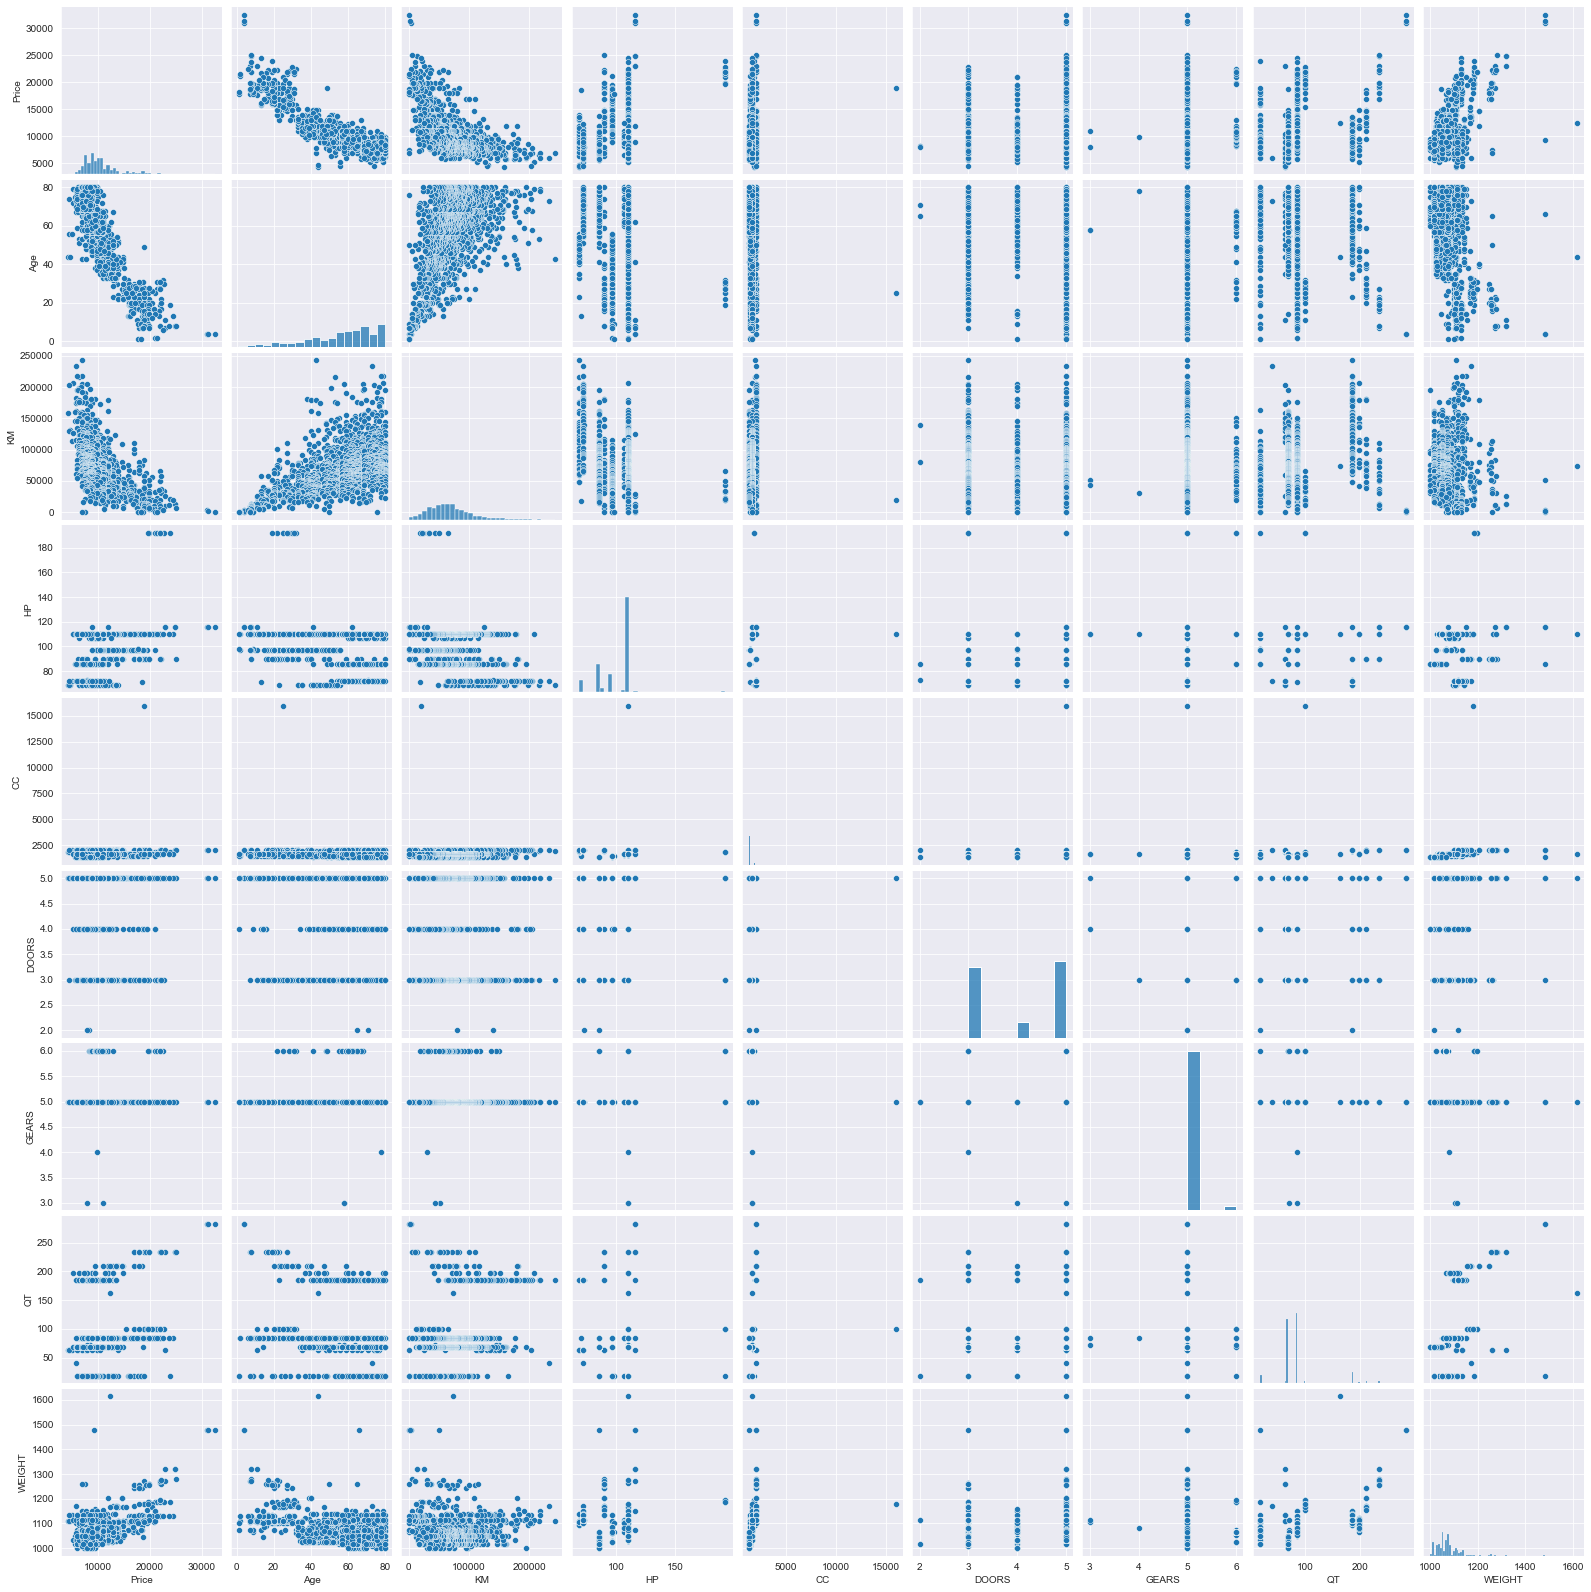

In [15]:
sns.pairplot(cars1)

# Preparing a model

In [16]:
model=smf.ols('	Price~Age+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=cars1).fit()

In [17]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
DOORS          -1.616641
GEARS         594.319936
QT              3.949081
WEIGHT         16.958632
dtype: float64

In [18]:
model.tvalues

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
DOORS        -0.040410
GEARS         3.016007
QT            3.014535
WEIGHT       15.879803
dtype: float64

In [19]:
model.pvalues

Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
DOORS         9.677716e-01
GEARS         2.606549e-03
QT            2.619148e-03
WEIGHT        2.048576e-52
dtype: float64

In [20]:
model.rsquared, model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

# calculating VIF

In [21]:
rsq_age=smf.ols('Age~KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=cars1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+CC+DOORS+GEARS+QT+WEIGHT',data=cars1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+CC+DOORS+GEARS+QT+WEIGHT',data=cars1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~Age+HP+KM+DOORS+GEARS+QT+WEIGHT',data=cars1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('DOORS~Age+KM+HP+CC+GEARS+QT+WEIGHT',data=cars1).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gear=smf.ols('GEARS~Age+KM+HP+CC+DOORS+QT+WEIGHT',data=cars1).fit().rsquared
vif_gear=1/(1-rsq_gear)

rsq_qt=smf.ols('QT~Age+KM+HP+CC+DOORS+GEARS+WEIGHT',data=cars1).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('WEIGHT~Age+KM+HP+CC+DOORS+GEARS+QT',data=cars1).fit().rsquared
vif_weight=1/(1-rsq_weight)

# storing vif values in dataframe
d1={'Variables':['Age','KM','HP','CC','DOORS','GEAR','QT','WEIGHT'],
   'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gear,vif_qt,vif_weight]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,DOORS,1.156575
5,GEAR,1.098723
6,QT,2.311431
7,WEIGHT,2.516420


# Residual Analysis

In [22]:
np.random.normal()

-0.2776116726663257

# Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'normal Q-Q plot of residual')

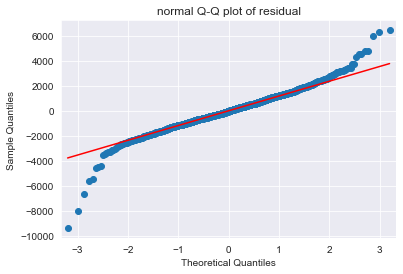

In [23]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal Q-Q plot of residual')


In [24]:
residuals=model.resid

In [25]:
residuals

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

<AxesSubplot:ylabel='Density'>

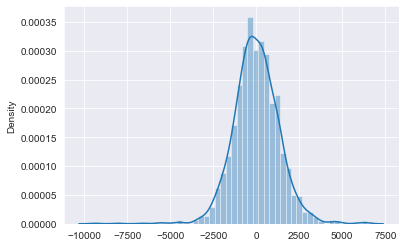

In [26]:
sns.distplot(residuals)

In [27]:
residuals.mean()

4.333447111516927e-09

In [28]:
predictions=model.fittedvalues

In [29]:
predictions

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [30]:
pd.DataFrame({'Actual':cars1.Price,
             'Predicted':predictions,
             'Error':residuals})

,Actual,Predicted,Error
0,13500,16812.580505,-3312.580505
1,13750,16272.355186,-2522.355186
2,13950,16800.732460,-2850.732460
3,14950,16426.496731,-1476.496731
4,13750,16222.419010,-2472.419010
...,...,...,...
1431,7500,8793.758297,-1293.758297
1432,10845,8291.338421,2553.661579
1433,8500,8454.298007,45.701993
1434,7250,8578.038121,-1328.038121


# Residual plot for Homoscedasticity

In [31]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

Text(0, 0.5, 'standarized residuals values')

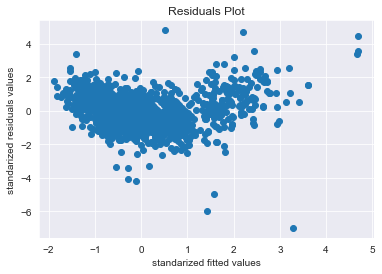

In [32]:
plt.scatter(get_standardized_values(predictions),
           get_standardized_values(residuals))
plt.title('Residuals Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residuals values')


# Residuals vs Regressors

eval_env: 1


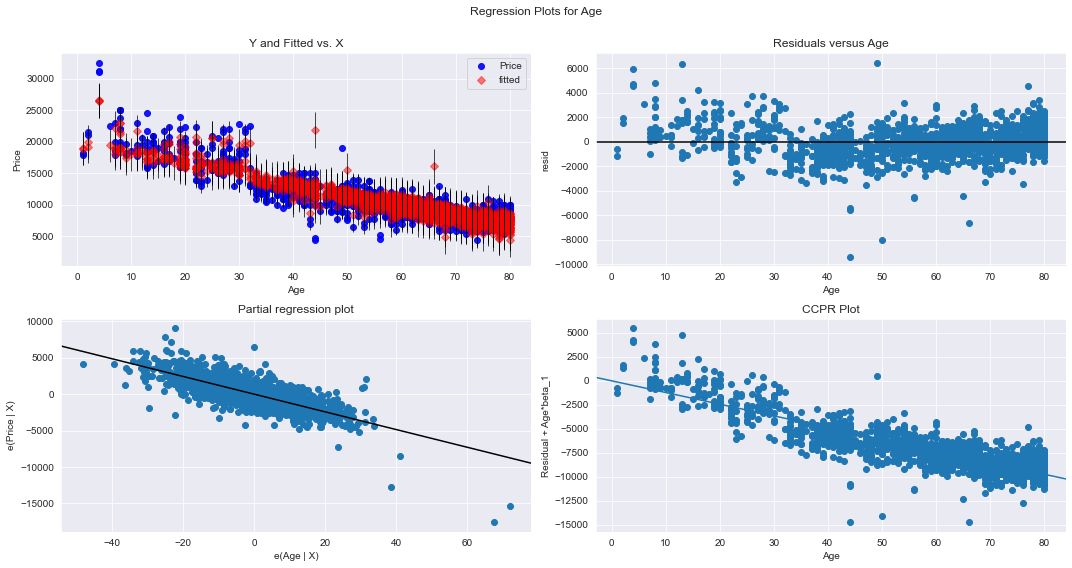

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)

eval_env: 1


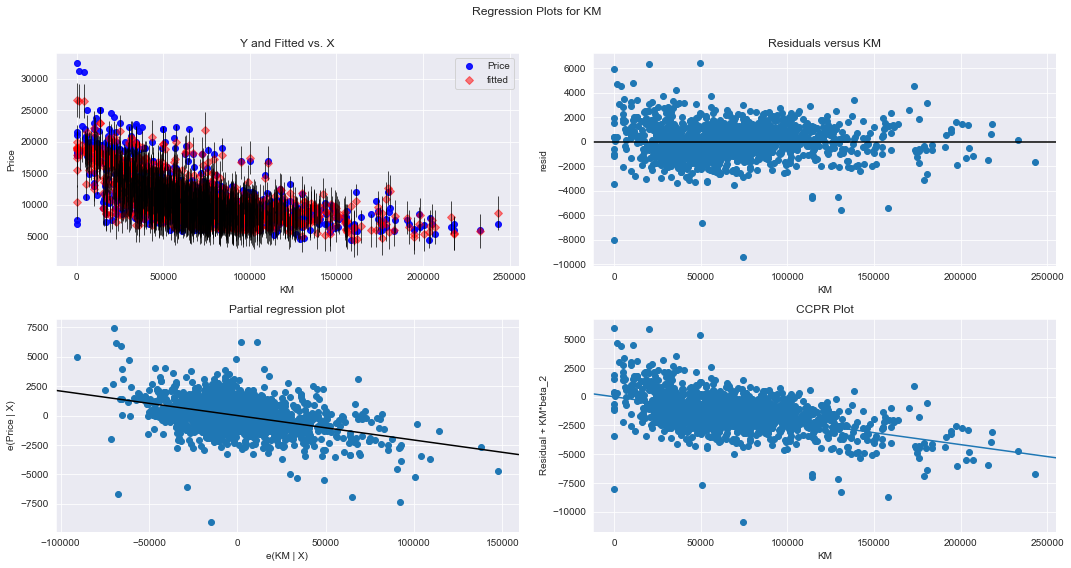

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)

eval_env: 1


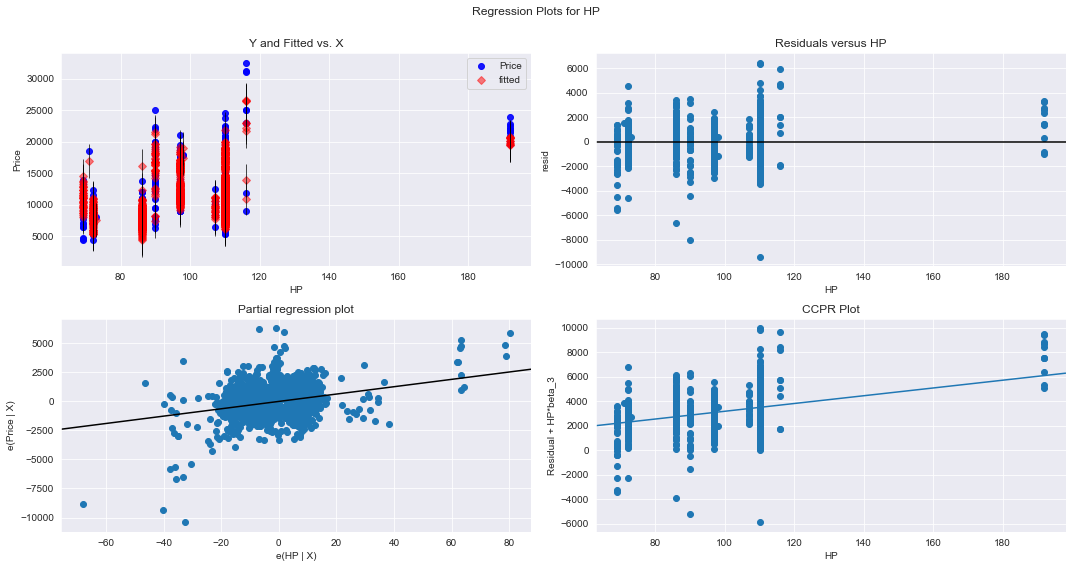

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)

eval_env: 1


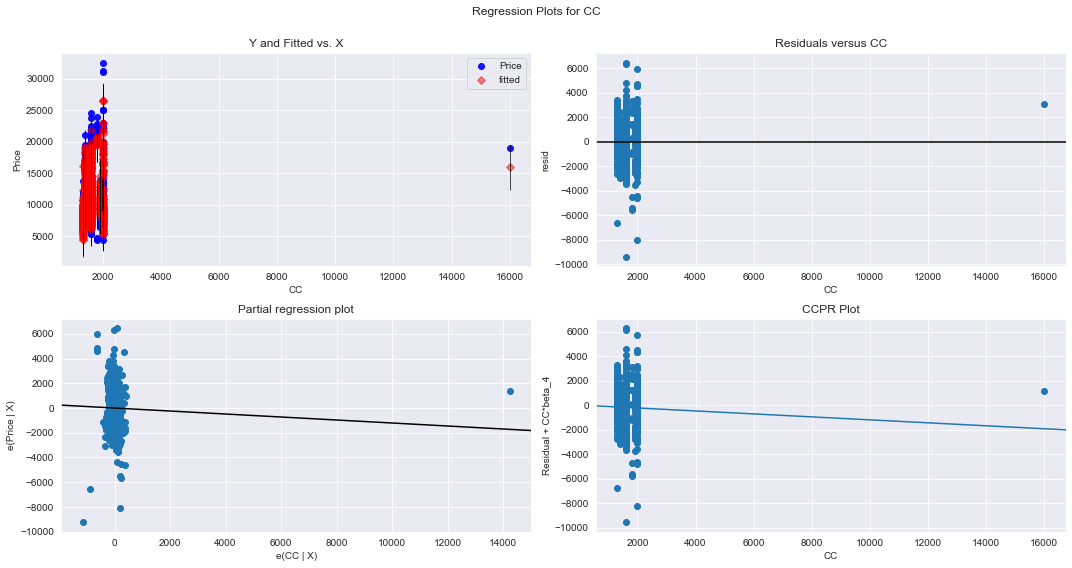

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"CC",fig=fig)

eval_env: 1


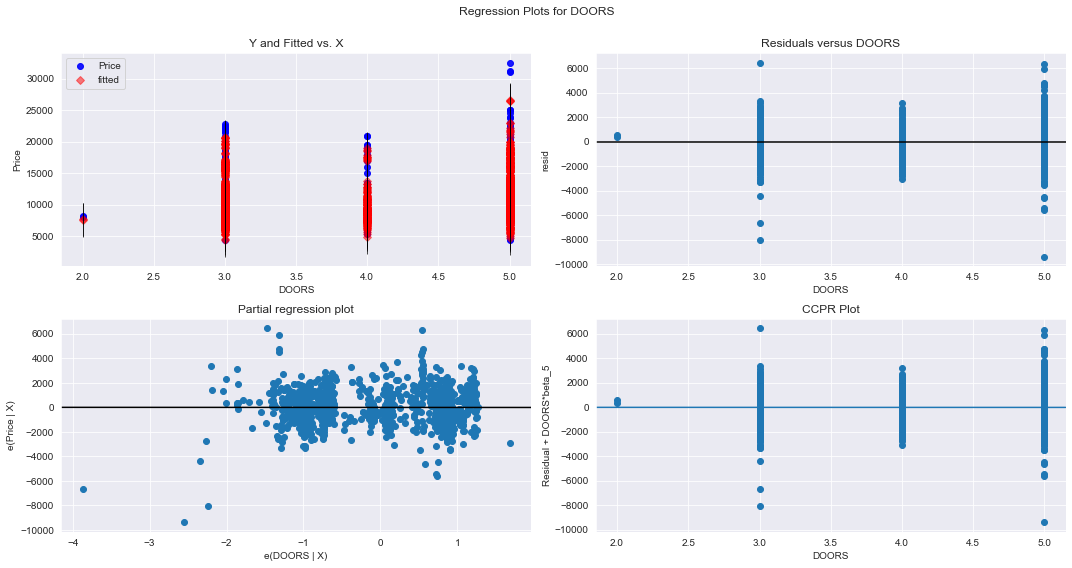

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"DOORS",fig=fig)

eval_env: 1


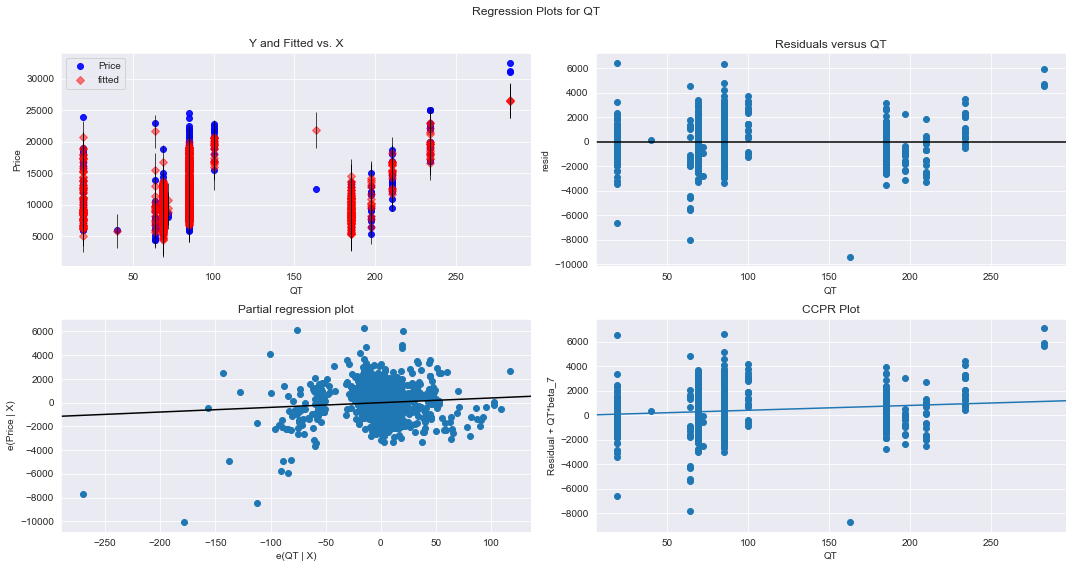

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QT",fig=fig)

eval_env: 1


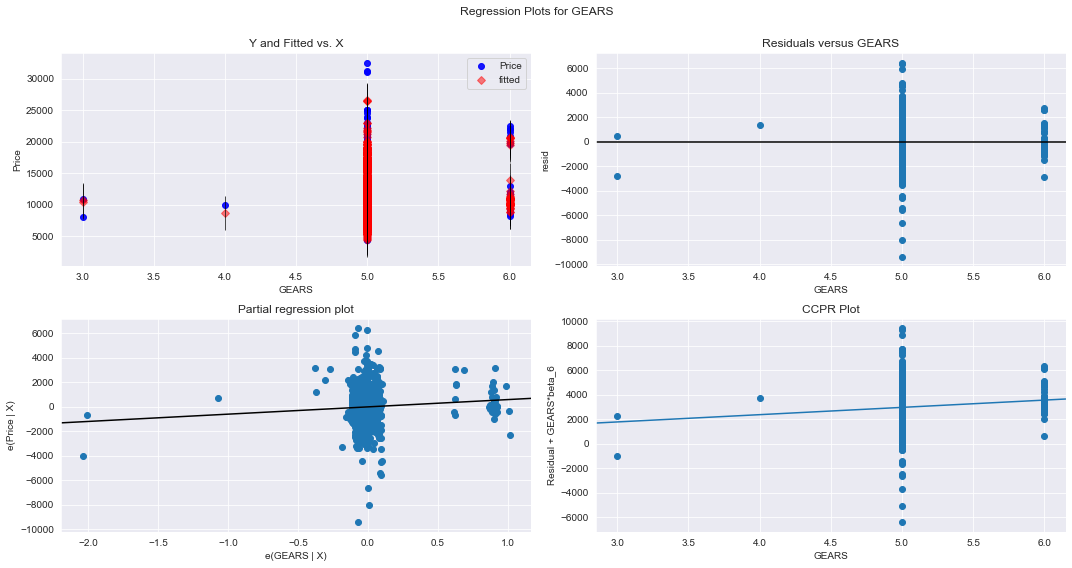

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"GEARS",fig=fig)

eval_env: 1


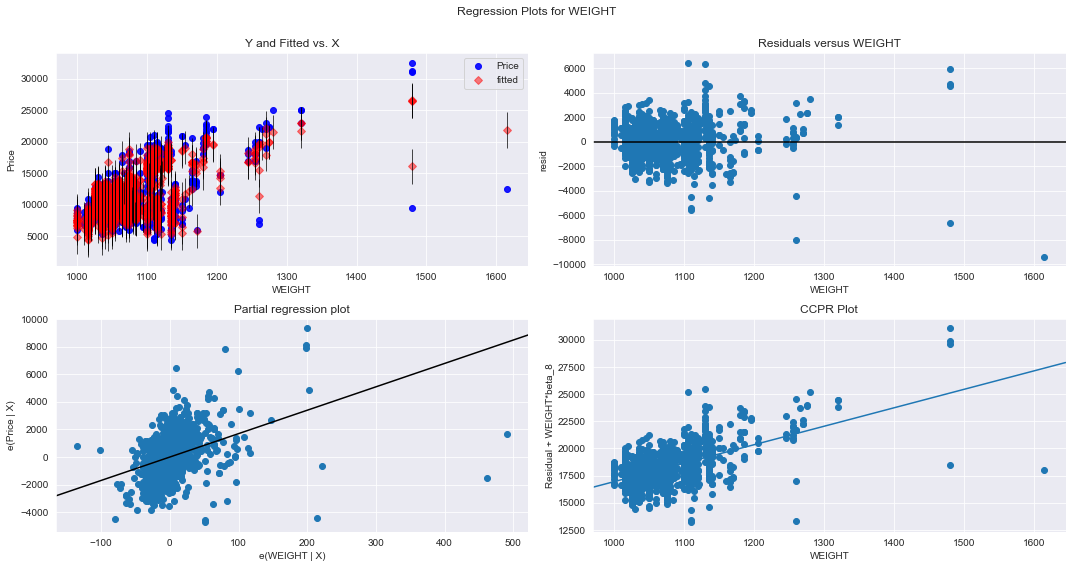

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"WEIGHT",fig=fig)

# Model Deletion Diagnostics


# Detecting Influencers/Outliers


# Cook's Distance


In [41]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

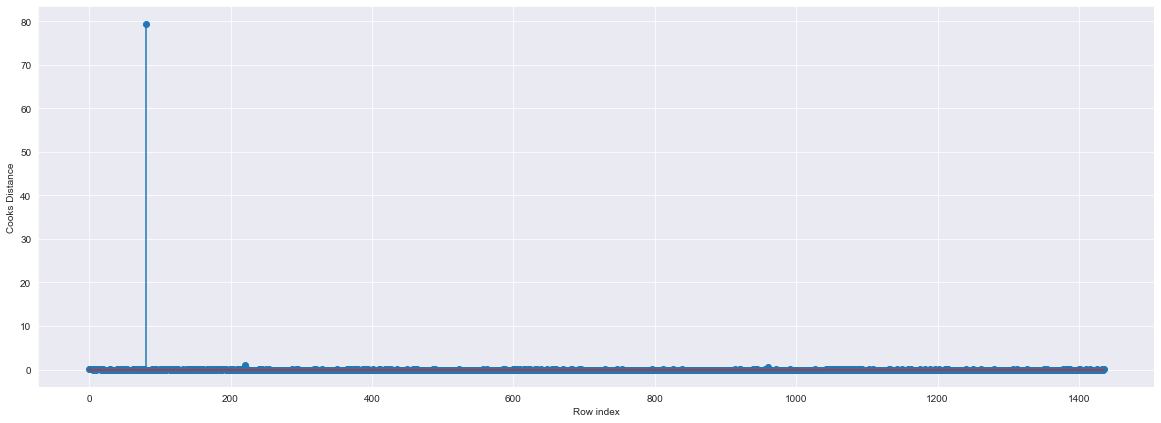

In [42]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c,7))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [43]:
(np.argmax(c),np.max(c))

(80, 79.5201062414182)

# High Influence Points

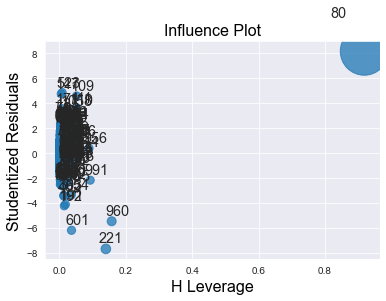

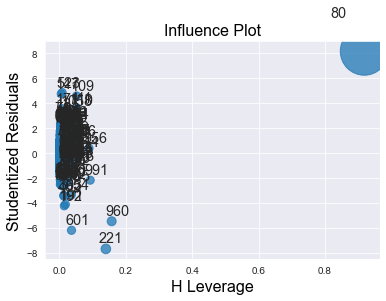

In [44]:
influence_plot(model)


In [45]:
k=cars1.shape[1]
n=cars1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [46]:
cars1[cars1.index.isin([80])]

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
80,18950,25,20019,110,16000,5,5,100,1180


# Improving The Model

In [47]:
cars2=cars1.drop(cars1.index[[80]],axis=0).reset_index()
cars2=cars2.drop(['index'],axis=1)
                 

In [48]:
cars2

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [49]:
model1=smf.ols('Price~Age+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=cars2).fit()

In [50]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:14:12   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
CC            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
DOORS        -27.2285     39.241     -0.694      0.488    -104.206      49.749
GEARS        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
WEIGHT        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model1_influence=model1.get_influence()
(c1,_)=model1_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

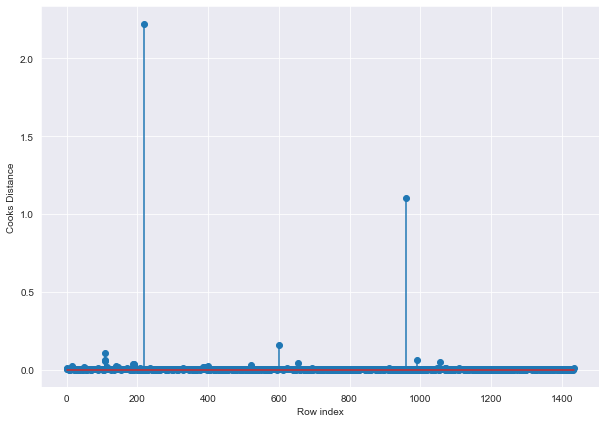

In [52]:
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(cars2)), np.round(c1, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')



In [53]:
(np.argmax(c1),np.max(c1))

(220, 2.224461171300723)

# High Influence Points

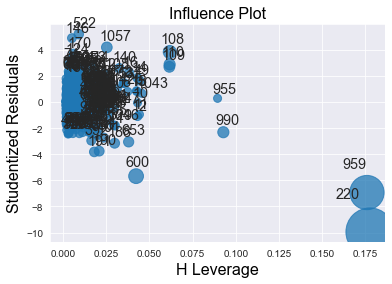

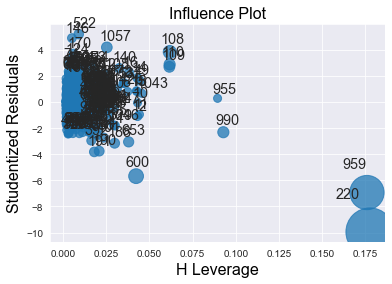

In [59]:
influence_plot(model1)

In [55]:

k = cars.shape[1] 
n = cars.shape[0] 

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.020891364902506964

In [56]:
cars2[cars2.index.isin([959,220])]

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


# Improving the model

In [61]:
cars2=cars2.drop(cars2.index[[959,220]],axis=0).reset_index()
cars2=cars2.drop(['index'],axis=1)
cars2

,Price,Age,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [62]:
model2=smf.ols('Price~Age+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=cars2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1371.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:22:21   Log-Likelihood:                -12209.
No. Observations:                1431   AIC:                         2.444e+04
Df Residuals:                    1422   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.473e+04   1433.829    -10.272      0.000   -1.75e+04   -1.19e+04
Age         -112.0350      2.482    -45.137      0.000    -116.904    -107.166
KM            -0.0170      0.001    -14.151      0.000      -0.019      -0.015
HP            36.6482      2.747     13.341      0.000      31.260      42.037
CC            -3.7922      0.302    -12.545      0.000      -4.385      -3.199
DOORS       -121.2571     37.526     -3.231      0.001    -194.870     -47.645
GEARS        464.6119    181.056      2.566      0.010     109.447     819.776
QT             5.2223      1.372      3.806      0.000       2.531       7.914
WEIGHT        30.6155      1.291     23.711      0.000      28.083      33.148
==============================================================================
Omnibus:                      121.490   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.535
Skew:                          -0.084   Prob(JB):                    7.60e-153
Kurtosis:                       6.424   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model2_influence=model2.get_influence()
(c2,_)=model2_influence.cooks_distance

In [66]:
(np.argmax(c2),np.max(c2))

(598, 0.3162942642461912)

# Prediction for new data


In [68]:
 new_data=pd.DataFrame({'Age':26,'KM':35000,'HP':60,'CC':1500,'DOORS':3,'GEARS':4,'QT':35,'WEIGHT':1200},index=[1])
model2.predict(new_data)

1    16690.708772
dtype: float64

In [69]:
model2.predict()

array([16333.41770509, 15892.36199617, 16311.03512127, ...,
        8644.38871426,  8758.12324734, 10642.59233109])